In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

C:\Users\south\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\south\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\south\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("Ukraine_emotions.csv")
data_neg_emotion = pd.read_csv("Ukraine_stressor.csv")

In [3]:
plot_data=data.groupby(['Emotion']).count()["tweet"]
plot_data = pd.DataFrame({'Emotion':plot_data.index, 'tweet_count':plot_data.values})
plot_data = plot_data.sort_values(by=['tweet_count'], ascending=False)

In [4]:
import matplotlib
from matplotlib import cm
from matplotlib.colors import rgb2hex

In [5]:
def select_color_palette (color,intervals,reverse = False):
    
    #get mathplotlib color with selection of color gradient
    cmap = matplotlib.colormaps[color]

    color_palette = []
    # round the number of color that would be used
    step_size = cmap.N // intervals
    
    for i in range(0,cmap.N,step_size):
        color_palette.append(np.delete(cmap(i), 3))
        
    # Check if the color value have yet changed to 255 scale
    if np.max(color_palette) < 1.00001:
        color_palette = np.round(np.array(color_palette)*255)
        
     # Mathplotlib use RGB, while OpenCV use BGR, so the color need to be reversed
    color_palette = color_palette[...,::-1]
    
    if reverse == True:
        color_palette = np.flip(color_palette)
        
    return color_palette

def rgb_to_hex(rgb_values):
    hex_values = []
    for rgb in rgb_values:
        hex_values.append('#%02x%02x%02x' % (rgb[0], rgb[1], rgb[2]))
    return np.array(hex_values)


['#3b1230' '#792d3a' '#ac4641' '#d35e45' '#ee7647' '#fd8c45' '#fca33a'
 '#eeb92a' '#d8cd1c' '#c0de18' '#aaeb22' '#8ef53c' '#6ffc5d' '#53ff80'
 '#3ffd9f' '#35f7b7' '#34eccd' '#37dde1' '#3acbf1' '#38b8fb' '#30a1fe'
 '#2587fc' '#196cf6' '#0f53ec' '#083fdf' '#042dce' '#021eb9' '#0112a1'
 '#020785']


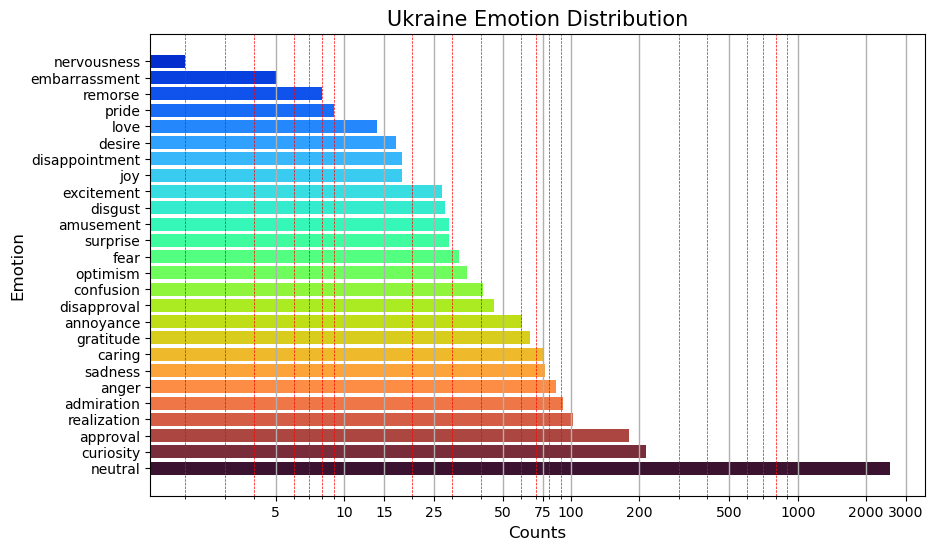

In [6]:
x=plot_data["Emotion"].to_list()
y=plot_data["tweet_count"].to_list()

my_cmap = select_color_palette("turbo",len(x))
my_cmap = np.array(my_cmap, dtype=int)

colors = rgb_to_hex(my_cmap)

print(colors)


fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.barh(x, y,color = colors)
ax1.set_xscale('log')
ax1.set_xticks([5, 10, 15, 25, 50, 75, 100, 200, 500, 1000, 2000, 3000])
ax1.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

plt.grid(axis = 'x', which ='major',linestyle='-', linewidth=1)
plt.grid(axis = 'x', which ='minor',linestyle='--',color='r',linewidth=0.5)
plt.title("Ukraine Emotion Distribution", fontsize=15)
plt.ylabel('Emotion', fontsize=12)
plt.xlabel('Counts', fontsize=12)

plt.show()

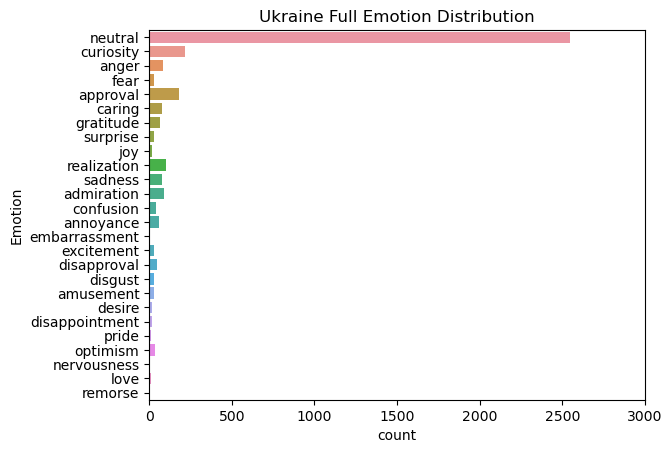

In [21]:
fig, ax = plt.subplots()
sns.countplot(data = data, y = 'Emotion', ax=ax).set_title("Ukraine Full Emotion Distribution")
ax.set_xlim(0,3000)
plt.show()

In [8]:
occur = data_neg_emotion.groupby(['Emotion']).size()
df2=data_neg_emotion.groupby(['Emotion'])[['replyCount','retweetCount','likeCount']].describe()

df2['tweet_count'] = occur

In [9]:
df2 = df2.sort_values(by=['tweet_count'], ascending=False)
df2.to_csv('Ukraine_Stressor_summary.csv',index=True)
df2

replyCount                                                 \
                    count      mean       std  min  25%  50%   75%   max   
Emotion                                                                    
curiosity           215.0  0.279070  1.259090  0.0  0.0  0.0  0.00  17.0   
realization         102.0  0.362745  0.853522  0.0  0.0  0.0  0.00   5.0   
anger                86.0  0.151163  0.447672  0.0  0.0  0.0  0.00   3.0   
sadness              77.0  0.259740  0.676730  0.0  0.0  0.0  0.00   4.0   
caring               75.0  0.200000  0.545250  0.0  0.0  0.0  0.00   3.0   
annoyance            61.0  0.229508  0.461644  0.0  0.0  0.0  0.00   2.0   
disapproval          46.0  0.543478  1.168218  0.0  0.0  0.0  1.00   6.0   
confusion            41.0  0.341463  0.854686  0.0  0.0  0.0  0.00   4.0   
fear                 32.0  0.500000  1.319824  0.0  0.0  0.0  0.25   7.0   
surprise             29.0  0.344828  0.552647  0.0  0.0  0.0  1.00   2.0   
disgust              28.0  0.071429  0.262265  0.0  0.0  0.0  0.00   1.0   
disappointment       18.0  0.166667  0.383482  0.0  0.0  0.0  0.00   1.0   
pride                 9.0  0.222222  0.666667  0.0  0.0  0.0  0.00   2.0   
remorse               8.0  0.500000  1.069045  0.0  0.0  0.0  0.25   3.0   
embarrassment         5.0  0.200000  0.447214  0.0  0.0  0.0  0.00   1.0   
nervousness           2.0  0.000000  0.000000  0.0  0.0  0.0  0.00   0.0   

               retweetCount            ...       likeCount            \
                      count      mean  ...   max     count      mean   
Emotion                                ...                             
curiosity             215.0  0.544186  ...  46.0     215.0  1.748837   
realization           102.0  0.156863  ...   4.0     102.0  0.656863   
anger                  86.0  0.232558  ...   6.0      86.0  0.581395   
sadness                77.0  0.701299  ...  31.0      77.0  2.610390   
caring                 75.0  0.093333  ...   1.0      75.0  0.320000   
annoyance              61.0  0.065574  ...   1.0      61.0  0.327869   
disapproval            46.0  0.695652  ...   9.0      46.0  1.847826   
confusion              41.0  0.048780  ...   1.0      41.0  0.414634   
fear                   32.0  0.218750  ...   2.0      32.0  0.343750   
surprise               29.0  0.172414  ...   4.0      29.0  0.896552   
disgust                28.0  0.071429  ...   1.0      28.0  0.428571   
disappointment         18.0  0.055556  ...   1.0      18.0  1.000000   
pride                   9.0  0.666667  ...   2.0       9.0  1.666667   
remorse                 8.0  0.000000  ...   0.0       8.0  0.250000   
embarrassment           5.0  0.200000  ...   1.0       5.0  0.800000   
nervousness             2.0  0.000000  ...   0.0       2.0  0.000000   

                                                      tweet_count  
                      std  min  25%  50%   75%    max              
Emotion                                                            
curiosity       10.910091  0.0  0.0  0.0  0.00  138.0         215  
realization      2.046466  0.0  0.0  0.0  0.75   17.0         102  
anger            1.758777  0.0  0.0  0.0  1.00   14.0          86  
sadness         13.790878  0.0  0.0  0.0  0.00  116.0          77  
caring           0.681017  0.0  0.0  0.0  0.00    3.0          75  
annoyance        0.889219  0.0  0.0  0.0  0.00    5.0          61  
disapproval      3.960737  0.0  0.0  0.0  1.00   19.0          46  
confusion        0.805469  0.0  0.0  0.0  1.00    3.0          41  
fear             1.153099  0.0  0.0  0.0  0.00    6.0          32  
surprise         2.304419  0.0  0.0  0.0  1.00    9.0          29  
disgust          0.997351  0.0  0.0  0.0  0.00    4.0          28  
disappointment   2.000000  0.0  0.0  0.0  0.75    7.0          18  
pride            1.658312  0.0  0.0  1.0  3.00    4.0           9  
remorse          0.462910  0.0  0.0  0.0  0.25    1.0           8  
embarrassment    1.303840  0.0  0.0  0.0  1.0

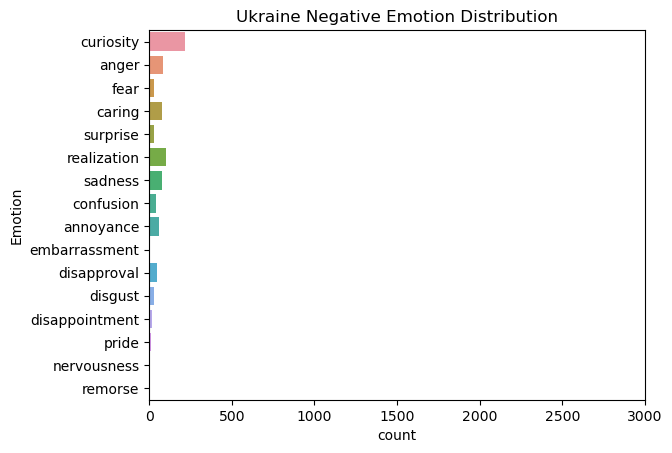

In [20]:
fig, ax = plt.subplots()
sns.countplot(data = data_neg_emotion, y = 'Emotion', ax=ax).set_title("Ukraine Negative Emotion Distribution")
ax.set_xlim(0,3000)
plt.show()

In [23]:
data_neg_emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         834 non-null    int64  
 1   ids           834 non-null    float64
 2   date          834 non-null    object 
 3   user          834 non-null    object 
 4   replyCount    834 non-null    int64  
 5   retweetCount  834 non-null    int64  
 6   likeCount     834 non-null    int64  
 7   lang          834 non-null    object 
 8   tweet         834 non-null    object 
 9   country       834 non-null    object 
 10  Emotion       834 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 71.8+ KB
